# AI Fundamentals - Assignment 3

This assignment requires you to use [Tensorflow](https://www.tensorflow.org) and [Keras](https://keras.io/). Keras is a high-level Deep Learning API written in Python working as an interface to TensorFlow.

This assignment is divided in two parts. In the first part you will learn about Keras with the help of the example below and the Keras [documentation](https://keras.io/). In the second part, you will practise training a Deep Learning model.

## How to submit
Submit by uploading this notebook to Canvas. It should include **plots**, **results** and **code** showing how the results were genereated.  Remember to name your file(s) appropriately.
It is due on 11:59 of December 9, 2020.

## Installation
Instructions can be found here:
* [Tensorflow](https://www.tensorflow.org/install/)

Since Tensorflow 2.0, Keras is included in Tensorflow and will be automatically installed with Tensorflow. It can be accessed as ```tensorflow.keras```

I recommend using ```pip```. For Tensorflow is it sufficient to install the CPU version. The GPU version requires a good workstation with high-end Nvidia GPU(s), and it is not necessary for this tutorial.

If you're using a virtualenv:
```
pip3 install tensorflow
```
Add ```sudo``` for a systemwide installation (i.e. no ```virtualenv```).
```
sudo pip3 install tensorflow
```
Make sure that you have ```sklearn```, ```matplotlib``` and ```numpy``` installed, too.


## Part 1 - understand a model

### Optimizers

Loss is the penalty for a bad prediction. That is, loss is a number indicating how bad the model's prediction was on a single example. If the model's prediction is perfect, the loss is zero; otherwise, the loss is greater than zero. The goal of training a model is to find a set of weights and biases (i.e. parameters) that have, on average, a low loss across all examples. The term cost is used interchangably with loss. See the [loss section](https://keras.io/losses/) in the Keras documentation for a list and descriptions of what is available.

![Side by side loss](https://drive.google.com/uc?id=1DdbQEQLCLCSw4uPsuf0C1nJCfUICT0Ae)
<b>Figure 1.</b> Left: high loss and right: low loss.

<!-- https://drive.google.com/file/d/1DdbQEQLCLCSw4uPsuf0C1nJCfUICT0Ae/view?usp=sharing
<img src="./fig/LossSideBySide.png" width="500">
<figcaption>Figure. Left: high loss and right: low loss.</figcaption>
 -->
The optimizer is the algorithm used to minimize the loss/cost. Optimizers in neural networks work by finding the gradient/derivative of the loss with respect to the parameters (i.e. the weights). "Gradient" is the correct term since a we are looking at multi-dimensional systems (i.e. many parameters), however, the terms are often used interchangably. For those who didn't take multivariate calculus, just think of the gradient as a derivative. The derivative of the loss with respect to a parameters tells us how much the loss changes when we nudge a weight up or down. So, by knowing how a given parameter affects the loss the optimizer can change it so as to decrease the loss. The various optimizers differ in how they change the weights. 

#### Mini-overview over popular optimizers

* **Stochastic Gradient Descent (SGD)**. This is the most basic and easy to understand optimizer. It updates the weights in the negative direction of the gradient by taking the average gradient of mini-batch of data (e.g. 20-1000 examples) in each step. Vanilla SGD only has one hyper-parameter, the learning rate.
* **Momentum**. This optimizer "gains speed" when the gradient has pointed in the same direction for several consecutive updates. That is, it has a momentum and want to keep moving in that direction. It gains momentum by accumulating an exponentially decaying moving average of past gradients. The step size depends on how large and aligned the sequence of gradients are. The most important hyper-parameter is alpha and common values are 0.5 and 0.9.
* **Nesterov Momentum**. This is a modification of the standard momentum optimizer.
* **AdaGrad**. This optimizer Ada-ptively sets the learning rate depending on the steepness/magnitude of the Grad-ients. This is done so that weights with big gradients get a smaller effective learning rate, and weights with small gradients will get a greater effective learning rate. The result is quicker progress in the more gently sloped directions of the weight space and a slowdown in stepp regions.
* **RMSProp**. This is modification of AdaGrad, where the accumulated gradient decays, that is, the influence of previous gradients gradually decreases.
* **Adam**. The name comes from "adaptive moments", and it is a combination of RMSProp and momentum. It has several hyper-parameters.

The above list just gives a quick overview of some of the most common. However, old optimizers are constantly improved and new are developed. SGD and momentum are most basic and easiest to understand and implement. They are still in use, but the more advanced optimizers tend to be better for practical use. Which one to use is generally an emperical question depending on both the data and the model.

For a more complete overview of optimization algorithms see [this comparison](http://ruder.io/optimizing-gradient-descent/), and to see what is available in Keras, see the [optimizer section](https://keras.io/optimizers/) of the documentation.

See the images below for a comparison of optimizers in a 2D space (NAG: Nesterov accelerated gradient, Adadelta: an extension of AdaGrad).

![Contours - optimizer comparison](https://drive.google.com/uc?id=1CmrD-UPZ7EIUjRuO_ib7k9CL1FO2bbLk)
<b>Figure 2.</b> Comparison of six different optimizers.


![Saddle point - optimizer comparison](https://drive.google.com/uc?id=1QVhN9rAvCjXtGyNZkmFivyyCzNsntObh)
<b>Figure 3.</b> Comparison of six different optimizers at a saddle point.

<!-- <img src="./fig/contours_evaluation_optimizers.gif" width="500">
<img src="./fig/saddle_point_evaluation_optimizers.gif" width="500"> -->

In [2]:
# imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.random.set_seed(2)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = X[:1000], y[:1000]
X = X.reshape(X.shape[0], 28, 28, 1)
# Normalize
X = X / 255.
# number of unique classes
num_classes = len(np.unique(y))
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1

In [3]:
type(X)

numpy.ndarray

In [4]:
X.shape

(1000, 28, 28, 1)

In [5]:
type(y)

numpy.ndarray

In [6]:
y.shape

(1000,)

In [7]:
ex_index = np.random.randint(y_train.shape[0], size=3)
ex_index

array([ 37, 235,  72])

In [8]:
y_oh_ex = y_oh[ex_index]
y_oh_ex

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
y_ex = y[ex_index]
y_ex

array([0, 3, 1])

In [10]:
X_train[ex_index][0].shape

(28, 28, 1)

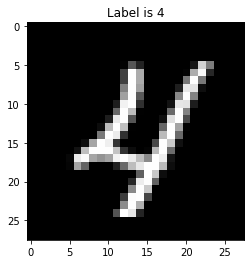

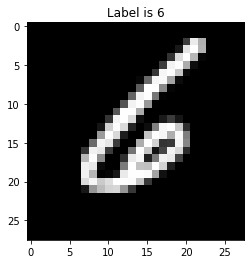

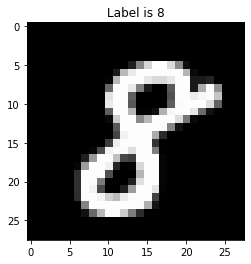

In [11]:
X_ex = X_train[ex_index]
X_ex = X_ex.reshape(X_ex.shape[0],28,28)

for i in range(3):
  plt.title('Label is {label}'.format(label=y_train[ex_index][i]))
  fig = plt.figure
  plt.imshow(X_ex[i], cmap='gray')
  plt.show()

### Question 1
**The data set**

Plot a three examples from the data set.

* What type of data are in the data set?

    ANS: Both X and y are numpy.ndarray but they have different shapes that X is in shape(1000,28,28,1) where y is in shape(1000,). That means X is a 4D array but y is a 1D array. 
    

* What does the line ```X = X.reshape(X.shape[0], 28, 28, 1)``` do?

    ANS: The original dataset has 70000 rows and 784 features. Here we take the first 1000 rows as our dataset in this assignment. Before the reshape, X has a shape of (1000,784) which means 1000 rows and 784 columns. The reshape command here is to transform X dataset to a dataset that contains 1000 images(rows), each of size 28*28 pixels(28^2=784 columns). And since they are grayscale images, the "1" is an empty dimension to match the input shape of the neural network.

Look at how the encoding of the targets (i.e. ```y```) is changed. E.g. the lines
```
    y_oh = np.zeros((num_tot, num_classes))
    y_oh[range(num_tot), y] = 1
```
Print out a few rows of ```y``` next to ```y_oh```.


* What is the relationship between ```y``` and ```y_oh```?

    ANS: y_oh is a 2D array whose length is the same as y, 1000. But y_oh has 10 columns representing y has 10 unique values. First we create a 2D array with all values are 0 in shape of (1000,10). Then we assign 1s to the 2D array according to the exact value of y. For example, if the 101th value of y is 6, then we fill the y_oh[100,5] with the number of 1. Therefore, we transformed the value of 6 to a expression of 0000010000. In this way, we made each entry of y become a binary series with length of 10. And we made a copy of y in catagorical variables instead of different integers. 
    
    
* What is the type of encoding in ```y_oh``` called and why is it used?

    ANS: This is called one-hot encoding. This is used because we want to take the value of y into catagorical variables to make ML algorithms to do a better job in prediction. The one hot encoding allows can convert categorical data into numbers, and these numbers are not ordered value, they are the symbols of catagories. This is required for both input and output variables that are categorical. When a one hot encoding is used for the output variable, it may offer a more nuanced set of predictions than a single label, and therefore, we can estimate the MSE loss correspondingly.
    
    
* Plot three data examples in the same figure and set the correct label as title. 
    * It should be possible to see what the data represent.

    ANS: Plots are shown as output above.

### Question 2
**The model**

Below is some code for bulding and training a model with Keras.
* What type of network is implemented below? I.e. a normal MLP, RNN, CNN, Logistic Regression...?

    ANS : This is a Convolutional Neural Network (CNN), maybe a multi-layer CNN since there are two layers of ReLu.
    
    
* What does ```Dropout()``` do?

    ANS: The dropout function here allows us to ignore a certain proportion of units in the CNN network. By dropping a unit out, we temporarily ignore it from the network, along with all its incoming and outgoing (hidden and visible) connections. The number specified in the Dropout() function is the fraction of the input units to drop.

    Dropout function allow us to learn a fraction of the inputs in the network in each training iteration, instead of learning all the inputs together. Therefore, we can prevent the co-dependency between parameters developed during training, and we can prevent our fitted model from overfitting. 


* Which type of activation function is used for the hidden layers?

    ANS : ReLu function is used for the hidden layers.


* Which type of activation function is used for the output layer?

    ANS: Softmax function is used for the output layer.


* Why are two different activation functions used?

    ANS : Because ReLu and Softmax have different advantages and uses. 
    
    ReLu function could train the network quickly because the gradient of ReLu is always high compared to other activation functions so that ReLu allows the network to converge very quickly. However, the Softmax function is totally different with ReLu. Softmax function is often used in the output layer because Softmax is able to normalizes the outputs for each catagory between 0 and 1, and divides by their sum, giving the probability of the input value being in a specific catagotry.

    To summarize, ReLu is used to train the model quickly while Softmax is to provide probability of a input belonging to a specific catagory.



* What optimizer is used in the model below?

    ANS : Stochastic gradient descent is used as the optimizer here.


* How often are the weights updated (i.e. after how many data examples)?

    ANS: We can see that we set the batch size to 32. And A batch size of 32 means that 32 samples from the training dataset will be used to estimate the error gradient before the model weights are updated. 

    Therefore, the weights will be updated after every 32 data examples.


* What loss function is used?

    ANS : Categorical Crossentropy loss function is used since we have 10 different label catagories. This loss function allows us to compute the crossentropy loss between the labels and predictions. 


* How many parameters (i.e. weights and biases, NOT hyper-parameters) does the model have?

    ANS : All Max-pooling functions do not require any parameters because it is a mathematical operation to find the maximum.

    The first Conv2D layer has 16 * (3 * 3+1) = 160 parameters. The second Conv2d layer has (3 * 3 * 16+1) * 32 = 4640 parameters. The third layer is a dense layer, from the output of model.summary() we can see that the third layer has (800+1) * 128 = 102528 parameters. And the last layer is a Softmax layer which has (128 * 10 +10) = 1290 parameters. Full architecture of the model is shown with the model.summary() command.

    Therefore, this model has 160 + 4640 + 102528 + 1290 = 108618 parameters. 


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Train the model
model.fit(X_train, y_oh_train, batch_size=32, epochs=60)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Epoch 1/60
25/25 [==============================] - 1s 19ms/step - loss: 2.2322
Epoch 2/60
25/25 [==============================] - 0s 19ms/step - loss: 1.3094
Epoch 3/60
25/25 [==============================] - 0s 20ms/step - loss: 0.5476
Epoch 4/60
25/25 [==============================] - 0s 20ms/step - loss: 0.3458
Epoch 5/60
25/25 [==============================] - 0s 20ms/step - loss: 0.2481
Epoch 6/60
25/25 [==============================] - 0s 19ms/step - loss: 0.1618
Epoch 7/60
25/25 [==============================] - 1s 20ms/step - loss: 0.1702
Epoch 8/60
25/25 [==============================] - 0s 19ms/step - loss: 0.1203
Epoch 9/60
25/25 [==============================] - 0s 19ms/step - loss: 0.0991
Epoch 10/60
25/25 [==============================] - 1s 21ms/step - loss: 0.0544
Epoch 11/60
25/25 [==============================] - 1s 24ms/step - loss: 0.0416
Epoch 12/60
25/25 [==============================] - 1s 20ms/step - loss: 0.0405
Epoch 13/60
25/25 [==================

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

## Part 2 - train a model

A model's performance depends on many factors apart from the model architecture (e.g. type and number of layers) and the dataset. Here you will get to explore some of the factors that affect model performance. Much of the skill in training deep learning models lies in quickly finding good values/options for these choises.

In order to observe the learning process it is best to compare the training set loss with the loss on the test set. How to visualize these variables with Keras is described under [Training history visualization](https://keras.io/visualization/#training-history-visualization) in the documentation.

You will explore the effect of 1) optimizer, 2) training duration, and 3) dropout (see the question above).

When training, an **epoch** is one pass through the full training set.

### Question 3

* **Vizualize the training**. Use the model above to observe the training process. Train it for 150 epochs and then plot both "loss" and "val_loss" (i.e. loss on the valiadtion set, here the terms "validation set" and "test set" are used interchangably, but this is not always true). What is the optimal number of epochs for minimizing the test set loss? 
    * Remember to first reset the weights (```model.reset_states()```), otherwise the training just continues from where it was stopped earlier.


* ANS: Below are the codes I run to visualize the loss and val_loss. Since the model.rest_state() does not work and model.compile() does not work either, I re-set the entire model each time. In the following code I train the model for 150 epochs. And from the plot in the output, we can see that the val_loss is approximately decreasing in the first 20 epochs and then the val_loss is steady increasing after 25 ~ 30 epochs. 

  Therefore, I would say the at least 30 epochs are required for the best performance(lowest val_loss). However I would use 30+20=50 epochs in the following parts to do the GridSearch for the hyperparameters.

Epoch 1/150
25/25 [==============================] - 1s 30ms/step - loss: 2.2317 - val_loss: 1.7812
Epoch 2/150
25/25 [==============================] - 1s 25ms/step - loss: 1.2515 - val_loss: 0.7918
Epoch 3/150
25/25 [==============================] - 1s 26ms/step - loss: 0.5384 - val_loss: 0.4853
Epoch 4/150
25/25 [==============================] - 1s 34ms/step - loss: 0.3447 - val_loss: 0.3674
Epoch 5/150
25/25 [==============================] - 1s 26ms/step - loss: 0.2615 - val_loss: 0.4285
Epoch 6/150
25/25 [==============================] - 1s 22ms/step - loss: 0.2047 - val_loss: 0.3760
Epoch 7/150
25/25 [==============================] - 1s 22ms/step - loss: 0.1651 - val_loss: 0.3550
Epoch 8/150
25/25 [==============================] - 1s 26ms/step - loss: 0.1485 - val_loss: 0.3529
Epoch 9/150
25/25 [==============================] - 1s 26ms/step - loss: 0.0979 - val_loss: 0.3083
Epoch 10/150
25/25 [==============================] - 1s 25ms/step - loss: 0.0642 - val_loss: 0.3670

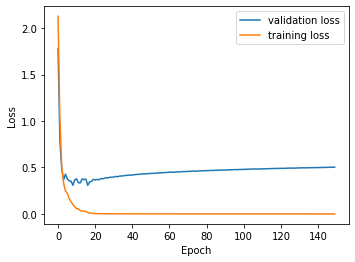

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Train the model
history = model.fit(X_train, y_oh_train, batch_size=32, epochs=150, validation_data=(X_test, y_oh_test))

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

# Plot learning
fig = plt.figure(figsize=(12,4))
ax0 = fig.add_subplot(121)
ax0.plot(history.history['val_loss'], label='validation loss')
ax0.plot(history.history['loss'], label='training loss')
ax0.set_ylabel('Loss')
ax0.set_xlabel('Epoch')
ax0.legend()


* **Optimizer**. Select three different optimizers and for each find the close-to-optimal hyper-parameter(s). In your answer, include a) your three choises, b) best hyper-parameters for each of the three optimizers and, c) the code that produced the results.
    * *NOTE* that how long the training takes varies with optimizer. I.e., make sure that the model is trained for long enough to reach optimal performance.

    ANS : Here I used Adam, Nadam(NAG) and Adadelta as the three optimizers I chose. Below are the codes to use Grid Search to find the optimal hyper-parameters. All Grid Search are done based on 50 epochs.

    Best hyper-parameters for Adam: beta_1 = 0.5, beta_2 = 0.8, learning_rate = 0.01. The final accuracy score is 0.931233
    
    Best hyper-parameters for Nadam(NAG): beta_1 = 0.9, beta_2 = 0.8, learning_rate = 1. The final accuracy score is 0.925000.

    Best hyper-parameters for Adadelta: rho = 1, learning_rate = 0.1. The final accuracy score is 0.191218.
    

In [28]:
# Use scikit-learn to grid search the hyperparameter for Adam
import numpy 
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Adam = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
Adadelta = Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07)
NAG = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Function to create model, required for KerasClassifier
def create_model(learning_rate=0.001, beta_1=0.9, beta_2=0.999):
	# create model
  model = Sequential()
  model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  # Max pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  # Max pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.))
  model.add(Dense(10, activation='softmax'))


  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=["accuracy"])

  return model
# fix random seed for reproducibility
seed = 1
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
space = dict()
space['learning_rate'] = [0.001, 0.01, 0.1,1]
space['beta_1'] = [0.5,0.7,0.9]
space['beta_2'] = [0.8,0.9,0.999]
space['batch_size'] = [32]
space['epochs']=[50]


grid = GridSearchCV(estimator=model, param_grid=space, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_oh_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))





Best: 0.931233 using {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'epochs': 50, 'learning_rate': 0.01}
0.913736 (0.015977) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'epochs': 50, 'learning_rate': 0.001}
0.931233 (0.014550) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'epochs': 50, 'learning_rate': 0.01}
0.917472 (0.020201) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'epochs': 50, 'learning_rate': 0.1}
0.911243 (0.015731) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'epochs': 50, 'learning_rate': 1}
0.919992 (0.026391) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.9, 'epochs': 50, 'learning_rate': 0.001}
0.914984 (0.015187) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.9, 'epochs': 50, 'learning_rate': 0.01}
0.912483 (0.019511) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.9, 'epochs': 50, 'learning_rate': 0.1}
0.923728 (0.019765) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.9, 'epochs': 50, 'learning_rate': 1}
0.9

In [18]:
# Use scikit-learn to grid search the hyperparameter of Nadam (NAG)
import numpy 
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Adam = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
Adadelta = Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07)
NAG = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Function to create model, required for KerasClassifier
def create_model(learning_rate=0.001, beta_1=0.9, beta_2=0.999):
	# create model
  model = Sequential()
  model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  # Max pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  # Max pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.))
  model.add(Dense(10, activation='softmax'))


  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer=NAG, metrics=["accuracy"])

  return model
# fix random seed for reproducibility
seed = 2
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
space = dict()
space['learning_rate'] = [0.001, 0.01, 0.1,1]
space['beta_1'] = [0.5,0.7,0.9]
space['beta_2'] = [0.8,0.9,0.999]
space['batch_size'] = [32]
space['epochs']=[50]


grid = GridSearchCV(estimator=model, param_grid=space, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_oh_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))





Best: 0.925000 using {'batch_size': 32, 'beta_1': 0.9, 'beta_2': 0.8, 'epochs': 50, 'learning_rate': 1}
0.921250 (0.015291) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'epochs': 50, 'learning_rate': 0.001}
0.907489 (0.023800) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'epochs': 50, 'learning_rate': 0.01}
0.914998 (0.004702) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'epochs': 50, 'learning_rate': 0.1}
0.921240 (0.010671) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'epochs': 50, 'learning_rate': 1}
0.916251 (0.019891) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.9, 'epochs': 50, 'learning_rate': 0.001}
0.920006 (0.006997) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.9, 'epochs': 50, 'learning_rate': 0.01}
0.914984 (0.009000) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.9, 'epochs': 50, 'learning_rate': 0.1}
0.911243 (0.018717) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.9, 'epochs': 50, 'learning_rate': 1}
0.9212

In [20]:
# Use scikit-learn to grid search the hyperparameter of Adadelta 
import numpy 
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

Adam = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
Adadelta = Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07)
NAG = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

# Function to create model, required for KerasClassifier
def create_model(learning_rate=0.001, rho=0.95):
	# create model
  model = Sequential()
  model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  # Max pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  # Max pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.))
  model.add(Dense(10, activation='softmax'))


  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer=Adadelta, metrics=["accuracy"])

  return model
# fix random seed for reproducibility
seed = 3
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
space = dict()
space['learning_rate'] = [0.001, 0.01, 0.1,1]
space['rho'] = [0.001, 0.01, 0.1,1]
space['batch_size'] = [32]
space['epochs']=[50]


grid = GridSearchCV(estimator=model, param_grid=space, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_oh_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))





Best: 0.191218 using {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.1, 'rho': 1}
0.142547 (0.026802) with: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.001, 'rho': 0.001}
0.166291 (0.024093) with: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.001, 'rho': 0.01}
0.122483 (0.024832) with: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.001, 'rho': 0.1}
0.145063 (0.036177) with: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.001, 'rho': 1}
0.133682 (0.042832) with: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.01, 'rho': 0.001}
0.162527 (0.035582) with: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.01, 'rho': 0.01}
0.148752 (0.007731) with: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.01, 'rho': 0.1}
0.152568 (0.039080) with: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.01, 'rho': 1}
0.111238 (0.011469) with: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.1, 'rho': 0.001}
0.167432 (0.055441) with: {'batch_size': 32, 'epochs': 50, 'l


* **Dropout**. Use the best optimizer and do hyper-parameter seach and find the best value for ```Dropout()```.

ANS: From  the above output we know that the Adam optimizer has the highest accuracy score of 0.931233 with beta_1 = 0.5, beta_2 = 0.8, learning_rate = 0.01. I do a Grid Search below to search for the optimal dropout rate.


The best value for the dropout rate is 0.4 with the improved accuracy score of 0.934997 while keeping beta_1 = 0.5, beta_2 = 0.8 and learning_rate = 0.01 unchanged.


In [31]:
# Use scikit-learn to grid search the dropout rate
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm

# Function to create model, required for KerasClassifier
def create_model(learning_rate=0.01, beta_1=0.5, beta_2=0.8, dropout_rate=0.):
	# create model
  model = Sequential()
  model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  # Max pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  # Max pooling
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.))
  model.add(Dense(10, activation='softmax'))


  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer=Adam, metrics=["accuracy"])

  return model

# fix random seed for reproducibility
seed = 4
numpy.random.seed(seed)

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

# define the grid search parameters
space = {}
space['dropout_rate'] =  [0, 0.2, 0.4, 0.6, 0.8]
space['learning_rate'] = [0.01]
space['beta_1'] = [0.5]
space['beta_2'] = [0.8]
space['batch_size'] = [32]
space['epochs']=[50]

grid = GridSearchCV(estimator=model, param_grid=space, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_oh_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.934997 using {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'dropout_rate': 0.4, 'epochs': 50, 'learning_rate': 0.01}
0.929989 (0.009918) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'dropout_rate': 0, 'epochs': 50, 'learning_rate': 0.01}
0.927501 (0.013782) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'dropout_rate': 0.2, 'epochs': 50, 'learning_rate': 0.01}
0.934997 (0.009366) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'dropout_rate': 0.4, 'epochs': 50, 'learning_rate': 0.01}
0.922484 (0.015179) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'dropout_rate': 0.6, 'epochs': 50, 'learning_rate': 0.01}
0.919992 (0.014499) with: {'batch_size': 32, 'beta_1': 0.5, 'beta_2': 0.8, 'dropout_rate': 0.8, 'epochs': 50, 'learning_rate': 0.01}


* **Best model**. Combine the what you learned from the above three questions to build the best model. How much better is it than the worst and average models?

    ANS : As we see from above, the best model is the one with Adam optimizer:  beta_1 = 0.5, beta_2 = 0.8 and learning_rate = 0.01 and dropout rate = 0.4. This model has the best accuracy score of 0.934997. 

    The worst one is the model with Adadelta whose accuracy score is 0.191218. The average of these models are (0.931233 + 0.925000 + 0.191218 + 0.934997)/4 = 0.74561125.

    Therefore, the best model is about 75% better than the worst one and 20% better than the averages. 



* **Results on the test set**. When doing this search for good model configuration/hyper-parameter values, the data set was split into *two* parts: a training set and a test set (the term "validation" was used interchangably wiht "test"). For your final model, is the performance (i.e. accuracy) on the test set representative for the performance one would expect on a previously unseen data set (drawn from the same distribution)? Why?

    ANS: 
    
    In the following code, I modified the model and plot the loss and the val_loss again with the hyperparameters of the best model where beta_1 = 0.5, beta_2 = 0.8 and learning_rate = 0.01 and dropout rate = 0.4. As we can see from the output below that the model accuracy on the test set is improved from 0.93 to 0.96. 

    However, this final best model may not work as well as expected on a previous unseen dataset, even the dataset is drawn from the same distribution. In previous questions, the hyperparameters are tuned with the training set data and the model are trained with training set. The "best" hyperparameters found by Grid Search are based on the model performance/accuracy on training set. Then, we selected the best final model solely based on the output of Grid Search. This means those "best hyperparameters" and the "best model" are the best for training set and they are not necesscary the best for the test/validation set. We should evaluate the model on the test/validation set with the tuned hyperparameters again each time whenever we did a Grid Search. And then, we should select the best model based on the best performance/accuracy on the test/validation set instead of on the training set. 

    From the loss and val_loss graph below we can see that the val_loss is very unstable while the loss of train set is steadly decreasing. 

    Therefore, in this case, the "best final model" has the risk of overfitting on the training set and it may not be significantly representative for the performance on a strange dataset. 




Epoch 1/50
25/25 [==============================] - 1s 29ms/step - loss: 1.9620 - val_loss: 0.5396
Epoch 2/50
25/25 [==============================] - 1s 23ms/step - loss: 0.5469 - val_loss: 0.4167
Epoch 3/50
25/25 [==============================] - 1s 22ms/step - loss: 0.3733 - val_loss: 0.3332
Epoch 4/50
25/25 [==============================] - 1s 23ms/step - loss: 0.3256 - val_loss: 0.2690
Epoch 5/50
25/25 [==============================] - 1s 22ms/step - loss: 0.2423 - val_loss: 0.2224
Epoch 6/50
25/25 [==============================] - 1s 23ms/step - loss: 0.1714 - val_loss: 0.2703
Epoch 7/50
25/25 [==============================] - 1s 22ms/step - loss: 0.1625 - val_loss: 0.2806
Epoch 8/50
25/25 [==============================] - 1s 22ms/step - loss: 0.1436 - val_loss: 0.3186
Epoch 9/50
25/25 [==============================] - 1s 22ms/step - loss: 0.1007 - val_loss: 0.1951
Epoch 10/50
25/25 [==============================] - 1s 22ms/step - loss: 0.0977 - val_loss: 0.2702
Epoch 11/

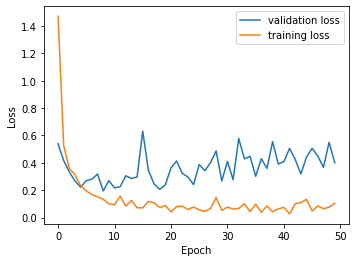

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

Adam = Adam(learning_rate=0.01,beta_1=0.5,beta_2=0.8,epsilon=1e-07,amsgrad=False)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam)

# Train the model
history = model.fit(X_train, y_oh_train, batch_size=32, epochs=50, validation_data=(X_test, y_oh_test))

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

# Plot learning
fig = plt.figure(figsize=(12,4))
ax0 = fig.add_subplot(121)
ax0.plot(history.history['val_loss'], label='validation loss')
ax0.plot(history.history['loss'], label='training loss')
ax0.set_ylabel('Loss')
ax0.set_xlabel('Epoch')
ax0.legend()

## Further information
For ideas about hyper-parameter tuning, take a look at the strategies described in the sklearn documentation under [model selection](https://scikit-learn.org/stable/model_selection.html), or in this [blog post](https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html) from TensorFlow. For a more thorough discussion about optimizers see [this video](https://www.youtube.com/watch?v=DiNzQP7kK-s) discussing the article [Descending through a Crowded Valley -- Benchmarking Deep Learning Optimizers](https://arxiv.org/abs/2007.01547).


**Good luck!**